<a href="https://colab.research.google.com/github/lucasjirwin/China-analysis/blob/main/China_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import csv
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
!git clone https://github.com/lucasjirwin/China-analysis.git


Cloning into 'China-analysis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [16]:
human_development = pd.read_csv("China-analysis/human_development_china.csv")

In [236]:
human_development.head()

,#country+code,#country+name,#indicator+code,#indicator+name,#indicator+value+num,#date+year
0,CHN,China,21806,Refugees by country of origin (thousands),207.7220,2017
1,CHN,China,23806,Population with at least some secondary educat...,77.4000,2017
2,CHN,China,23906,Population with at least some secondary educat...,74.0200,2017
3,CHN,China,24006,Population with at least some secondary educat...,82.0000,2017
4,CHN,China,24106,"Mean years of schooling, female (years)",7.5952,2017


In [57]:
world_bank = pd.read_csv("China-analysis/China_worldbank.csv", delimiter = ",", skiprows = 3)

In [237]:
world_bank.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,China,CHN,"Internally displaced persons, new displacement...",VC.IDP.NWCV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,China,CHN,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R2.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.312864,3.616387,3.018876,1.889762,1.390471,1.462428,1.265828,1.398545,1.185311,1.363083,1.102602,0.829756,0.477826,0.245961,3.379052,3.719918,1.868790,1.784985,1.705996,1.806618,1.821257,1.582006,1.904320,1.698381,2.058048,2.757723,3.051891,3.614674,4.467301,5.067104,5.597116,4.240744,4.438311,4.643275,4.689855,4.804549,4.728193,3.597501,3.983005,4.256147,4.256601,NaN,NaN,NaN
2,China,CHN,Net barter terms of trade index (2000 = 100),TT.PRI.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.441861,120.238095,117.283951,100.000000,96.590909,92.553191,85.106383,94.505495,90.721649,102.173913,102.105263,101.030928,103.092783,101.041667,102.040816,101.941748,105.940594,110.204082,110.638298,104.123711,100.000000,97.440440,92.111666,92.930841,90.767724,88.442555,89.472953,88.546209,83.812363,91.096172,82.050594,79.048743,79.755236,80.647716,82.948799,92.533450,92.328445,87.294741,84.624728,NaN,NaN,NaN
3,China,CHN,Merchandise imports from high-income economies...,TM.VAL.MRCH.HI.ZS,NaN,80.795098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.545888,75.026669,79.468341,81.135434,77.080172,77.913209,82.120262,83.233365,82.984790,84.072952,80.708230,79.056963,84.508890,86.886109,84.759971,83.759276,85.278173,84.250526,82.641952,82.546940,83.924576,83.108167,78.928234,78.440670,76.678230,73.964162,72.484598,69.715839,68.105462,66.847290,65.572348,66.413678,64.730815,63.452392,61.790304,63.036311,63.425893,65.248834,66.028862,65.102028,63.641302,NaN,NaN,NaN
4,China,CHN,Share of tariff lines with international peaks...,TM.TAX.TCOM.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.909440,63.207280,63.630660,NaN,44.498560,34.569930,33.410030,35.702600,37.205170,36.521440,28.850690,23.407570,17.191680,14.426450,14.927240,18.644070,19.303440,18.473710,14.298450,18.605460,NaN,NaN,17.613510,18.230520,19.143440,22.472070,13.928480,NaN,NaN,NaN


In [127]:
Gini_data = world_bank.loc[world_bank["Indicator Name"] == "Gini index (World Bank estimate)"]

Gini_data = Gini_data.dropna(axis = 1)
Gini_data


,Country Name,Country Code,Indicator Name,Indicator Code,1990,1996,1999,2002,2005,2008,2010,2011,2012,2013,2014,2015,2016
792,China,CHN,Gini index (World Bank estimate),SI.POV.GINI,32.2,35.2,38.7,42.0,40.9,43.0,43.7,42.4,42.2,39.7,39.2,38.6,38.5


In [207]:
x_vals = np.array(Gini_data.columns[4:])
x_vals = x_vals.astype(float)
x_vals = x_vals.reshape((13))
y_vals = np.array(Gini_data)
y_vals = y_vals[:,4:]
y_vals = y_vals.astype(float)
y_vals = y_vals.reshape((13))




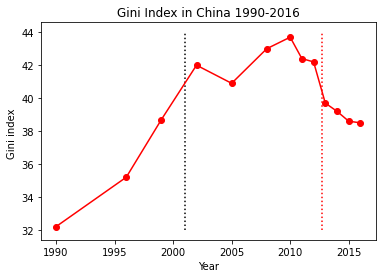

In [274]:
fig, ax = plt.subplots()
scatter = ax.scatter(x_vals, y_vals, c = "red")
plt.title("Gini Index in China 1990-2016")
plt.xlabel("Year")
plt.ylabel("Gini index ")
plt.vlines(2012.75, ymin = 32, ymax= 44, colors = "red", linestyles= "dotted")
plt.vlines(2001, ymin = 32, ymax= 44, colors = "black", linestyles= "dotted")
plt.plot(x_vals,y_vals, color = "red")

plt.show()


In [271]:
import scipy.stats as stats
Gini_array = np.append(x_vals.reshape(13,1), y_vals.reshape(13,1),axis = 1)

# Test difference between expected values for Gini coefficient between 2002-
# 2011, the period between China's ascension to the WTO and Xi's rise, 
# and 2013-2016, the period after Xi's rise. 
t, p = stats.ttest_ind(Gini_array[3:7,1], Gini_array[7:,1], equal_var= False)
print(t,p) # t-value is 2.44 and p-value is 0.0407

2.441197295554842 0.04072556650587296


H0: The rate of inequality in China between China's ascension to the WTO in 2001 and the rise of Xi Jinping in 2012 was no different to inequality after Xi's rise. 

H1: Inequality in China changed after the rise of Xi.

The data supports the alternative hypothesis, H1, that inequality in China changed after the ascension of Xi Jinping. The vertical, dotted black line signifies China's ascension to the WTO and the dotted red line signifies the rise of Xi. There is a rapid and obvious drop in the Gini coefficient after his rise, signalling a reduction of inequality which I postulated resulted from Xi's anti-corruption domestic policies. 

By conducting a two sided t-test for the null hypothesis, I showed that the difference in the Gini coefficient for the two periods was significant. The p-value was 0.0407 which is < 0.05 so the result is significant at the 95% level. 

In [269]:
Education_data = human_development.loc[human_development["#indicator+name"] == "Population with at least some secondary education (% ages 25 and older)"]

In [270]:
Education_data.head()

,#country+code,#country+name,#indicator+code,#indicator+name,#indicator+value+num,#date+year
1,CHN,China,23806,Population with at least some secondary educat...,77.400,2017
70,CHN,China,23806,Population with at least some secondary educat...,77.400,2016
154,CHN,China,23806,Population with at least some secondary educat...,74.986,2015
252,CHN,China,23806,Population with at least some secondary educat...,74.986,2014
352,CHN,China,23806,Population with at least some secondary educat...,72.572,2013
